### 의사결정 나무
+ 나무 모양의 그래프를 사용해서 최적의 결정을 돕는 분석 기법
+ 기회비용에 대한 고려, 기대 이익계산, 위험관리 등 효율적인 결정이 필요한 분야에 사용되고 있음
+ 의사결정트리는 회귀/분류에 사용되지만 주로 분류에 사용

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mldlpy3

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs

#### 가상의 데이터를 사용한 의사결정나무 분석
+ centers : 군집수
+ cluster_std : 군집의 표준편차 (흩어짐 정도)

In [21]:
X,y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=2111091705)

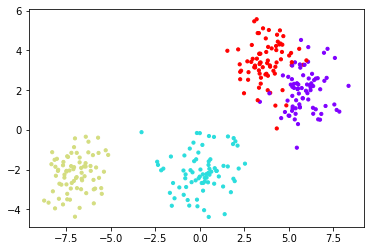

In [22]:
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'rainbow', s=10)

#### 의사결정트리로 분석 후 시각화

In [5]:
dtclf = DecisionTreeClassifier()

In [9]:
dtclf.fit(X, y)

DecisionTreeClassifier()

In [8]:
dtclf.score(X, y)

1.0

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


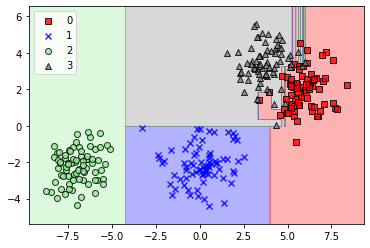

In [11]:
mldlpy3.plot_decision_regions(X, y, dtclf)

#### 훈련/테스트 데이터로 나눠 재학습후 시각화

In [13]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=2111091705)

#### criterion : 정보이득 알고리즘 지정(CART, gini, entropy) 
+ entopy : 정보가 너무 많아 결정이 불확실해지는 정도
#### max_depth : 

In [15]:
dtclf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtclf.fit(Xtrain, ytrain)
pred = dtclf.predict(Xtest)

In [16]:
accuracy_score(ytest, pred)

0.9333333333333333

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


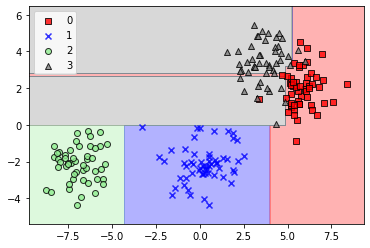

In [17]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, dtclf)

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


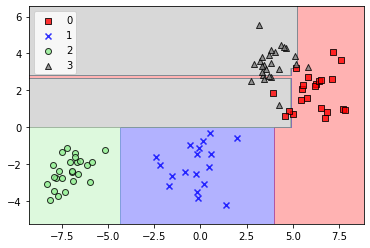

In [18]:
mldlpy3.plot_decision_regions(Xtest, ytest, dtclf)

#### 분류결과를 tree 형태로 시각화
+ 출력하려면 graphviz라는 라이브러리 필요
+ graphviz.org -> graphviz-2.49.3.zip
    + c:/Java 아래에 압축해제
    + 폴더명은 graphviz-2.49로 설정
    + bin 폴더를 PATH 환경변수로 등록

+ bin 폴더를 PATH 환경변수로 등록

In [15]:
import pydotplus
from sklearn import tree

#### 그래프 관련 dot 데이터 추출

In [24]:
dot_data = tree.export_graphviz(dtclf, out_file=None)

#### dot데이터를 토대로 그래프 생성

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data)

#### 그래프를 그림파일로 저장

In [25]:
graph.write_png('img/blob.png')

True

#### 그림파일을 주피터에서 출력

In [26]:
import matplotlib.image as pltimg

In [28]:
img = pltimg.imread('img/blob.png')

(-0.5, 1496.5, 636.5, -0.5)

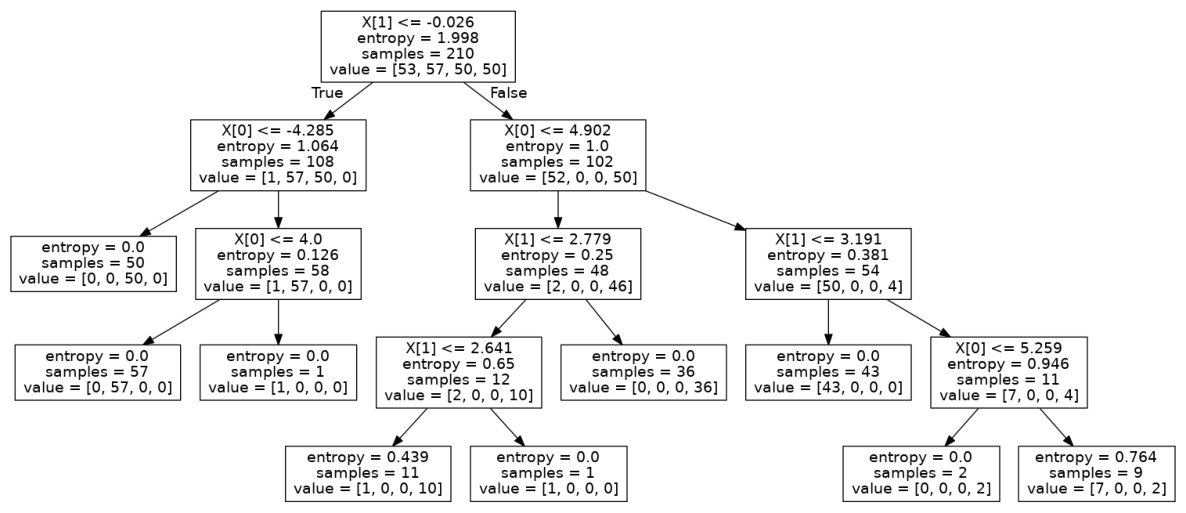

In [30]:
plt.figure(figsize=(21,12))
plt.imshow(img)
plt.axis('off')

### iris 데이터를 사용한 의사결정나무 분석

In [2]:
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

#### 데이터 적재 및 분할

In [10]:
iris = load_iris()

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, train_size=0.3, stratify = iris.target, random_state=2111100945)

In [12]:
dtclf = DecisionTreeClassifier(criterion = 'entropy')
dtclf.fit(Xtrain,ytrain)
pred = dtclf.predict(Xtest)

In [13]:
accuracy_score(ytest, pred)

0.9333333333333333

#### 의사결정나무 분석 시각화

In [16]:
dot_data = tree.export_graphviz(dtclf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('img/iris.png')

True

(-0.5, 679.5, 580.5, -0.5)

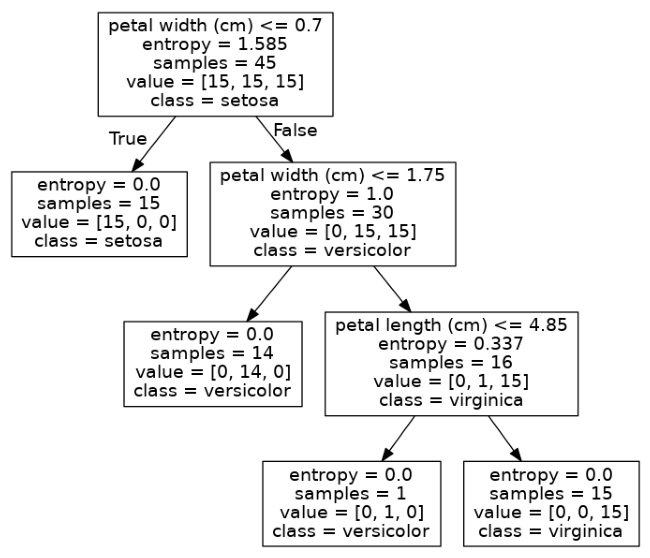

In [17]:
img = plt.imread('img/iris.png')
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')

#### 결정영역 시각화

In [7]:
import mldlpy3

In [20]:
xdata = iris.data[:, :2]    # petal 계열만
dtclf.fit(xdata, iris.target)

DecisionTreeClassifier(criterion='entropy')

/home/hadoop/mldlpy3.py:38: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


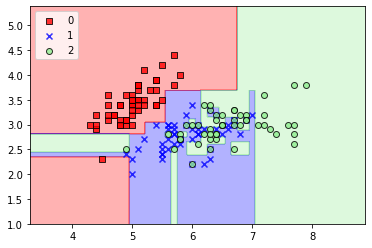

In [19]:
mldlpy3.plot_decision_regions(xdata, iris.target, dtclf)

In [65]:
xdata = iris.data[:, 2:]    # sepal 계열만
dtclf.fit(xdata, iris.target)

DecisionTreeClassifier(criterion='entropy')

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


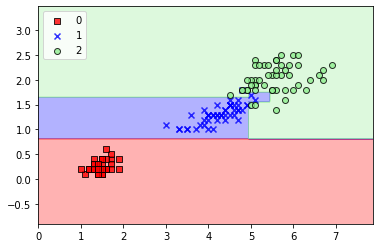

In [66]:
mldlpy3.plot_decision_regions(xdata, iris.target, dtclf)